In [3]:
import os,glob
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report


In [5]:
file_path=r"Psoriasis_dataset/type"

In [6]:
#list of all files and directories in the folder
name_class=os.listdir(file_path)
name_class


[' psoriasis', '.ipynb_checkpoints', 'guttate psoriasis']

In [11]:
#(**/  --> search recursively in all subdirectories  )
#(*.*  --> match all files that have an extension (like .jpg, .png, .txt, etc )

filepaths=list(glob.glob(file_path+'/**/*.*'))
filepaths


['Psoriasis_dataset/type\\ psoriasis\\0_10.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_11.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_14.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_15.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_17.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_2.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_20.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_22.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_24.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_27.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_30.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_36.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_39.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_40.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_44.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_45.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_5.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_51.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_7.jpg',
 'Psoriasis_dataset/type\\ psoriasis\\0_8.jpg',
 'Psoriasis_dataset/type

In [15]:
#For each file path, get the name of the folder it is in (that’s the label), and put all of them in a list called labels."
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels


[' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psoriasis',
 ' psorias

In [26]:
filepath=pd.Series(filepaths,name='Filepath').astype(str)
labels=pd.Series(labels,name='label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,label
0,Psoriasis_dataset/type\guttate psoriasis\0_44.jpg,guttate psoriasis
1,Psoriasis_dataset/type\psoriasis\1_64.jpg,psoriasis
2,Psoriasis_dataset/type\psoriasis\2_19.jpg,psoriasis
3,Psoriasis_dataset/type\psoriasis\10_38.jpg,psoriasis
4,Psoriasis_dataset/type\guttate psoriasis\18_57...,guttate psoriasis


In [30]:
train,test=train_test_split(data,test_size=0.25,random_state=42)

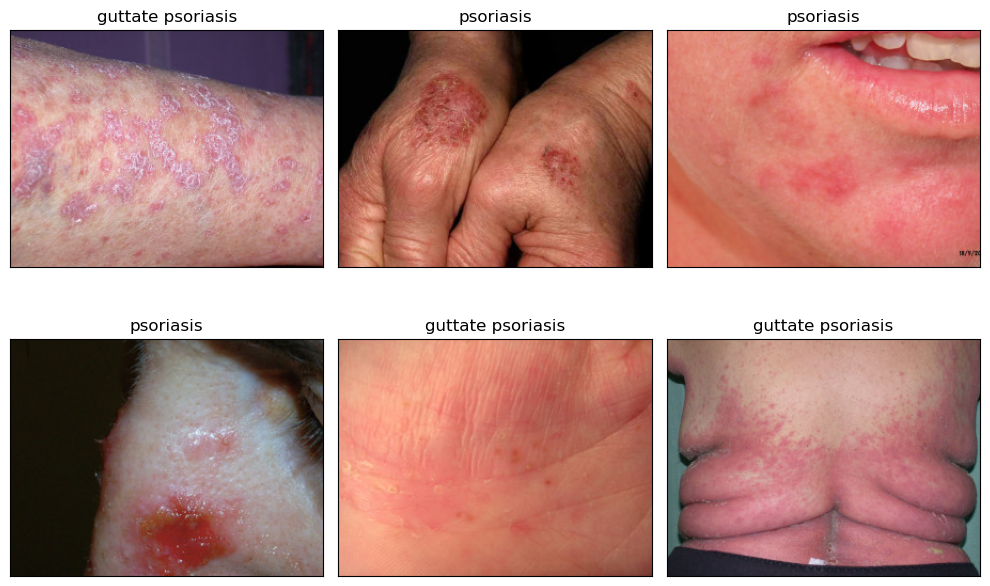

In [40]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.label[i])
    plt.tight_layout()
plt.show()   


In [42]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen=train_datagen.flow_from_dataframe(dataframe=train,x_col='Filepath',y_col='label',target_size=(100,100),class_mode='categorical',batch_size=32,shuffle=True,seed=42)
valid_gen=train_datagen.flow_from_dataframe(dataframe=test,x_col='Filepath',y_col='label',target_size=(100,100),class_mode='categorical',batch_size=32,shuffle=False,seed=42)
test_gen=test_datagen.flow_from_dataframe(dataframe=test,x_col='Filepath',y_col='label',target_size=(100,100),class_mode='categorical',batch_size=32,shuffle=False)                                           


Found 687 validated image filenames belonging to 2 classes.
Found 230 validated image filenames belonging to 2 classes.
Found 230 validated image filenames belonging to 2 classes.


In [44]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten



In [46]:
# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


In [48]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False


In [50]:
# Add custom classification layers
gx = Flatten()(base_model.output)
gx = Dense(256, activation='relu')(gx)
gx = Dense(128, activation='relu')(gx)
gx = Dense(2, activation='softmax')(gx)  # Assuming 10 classes


In [52]:
# Create the final model
model = Model(inputs=base_model.input, outputs=gx)


In [56]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,927,746 (60.76 MB)

 Trainable params: 1,213,058 (4.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [62]:
my_callbacks=[EarlyStopping(monitor='val_accurancy',
min_delta=0,
                           patience=2,
                           mode='auto')]


In [64]:
history=model.fit(
train_gen,
validation_data=valid_gen,
    epochs=2)


E:\Ana\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.5614 - loss: 5.3439 - val_accuracy: 0.4217 - val_loss: 2.4994
Epoch 2/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7978 - loss: 0.8082 - val_accuracy: 0.7043 - val_loss: 1.8180


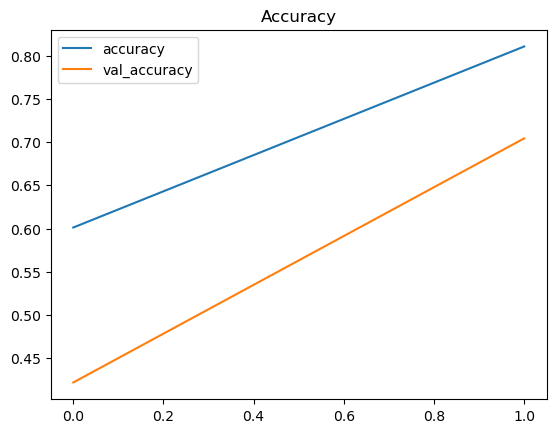

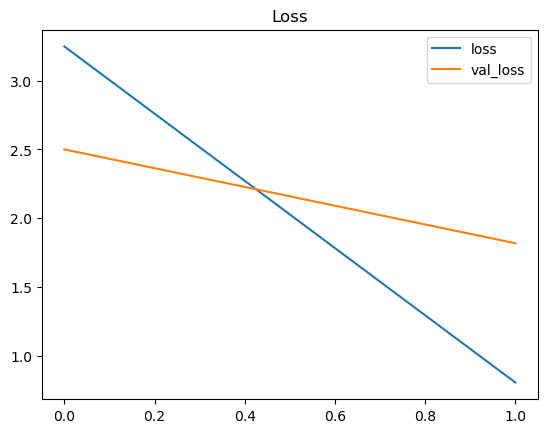

In [66]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()


pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()


In [71]:
results=model.evaluate(test_gen,verbose=0)

print("Test Loss: {:.4f}".format(results[0]))

print("Test Accuracy: {:.2f}%".format(results[1]*100))


Test Loss: 1.8180
Test Accuracy: 70.43%


In [143]:
# Load the image\
import  cv2
image = cv2.imread(r"Psoriasis_dataset/type/guttate psoriasis/0_2.jpg")


In [145]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


In [147]:
# Define red color range
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([8, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])



In [149]:
# Create masks for red color
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask1 + mask2


In [151]:
# Extract the red parts from the image
red_extracted = cv2.bitwise_and(image, image, mask=mask)



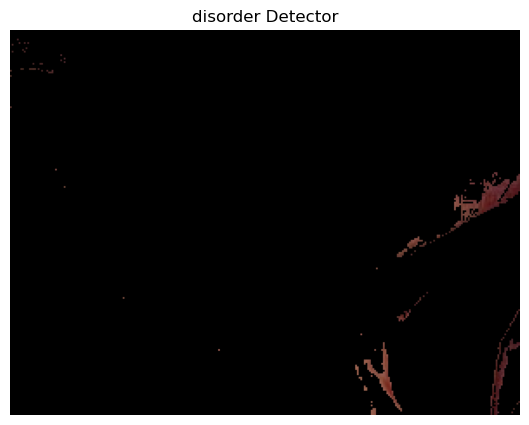

In [153]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(red_extracted, cv2.COLOR_BGR2RGB))
plt.title("disorder Detector")
plt.axis("off")
plt.show()



In [155]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [157]:
img_path=r"Psoriasis_dataset/type/guttate psoriasis/0_2.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[[70 29]]


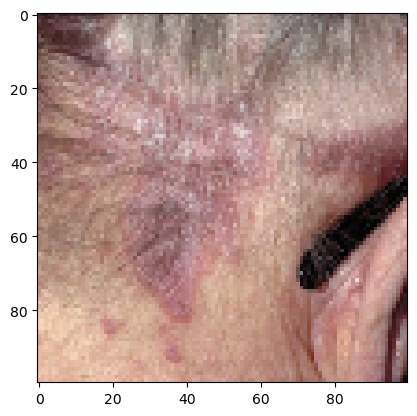

In [159]:
img=cv2.imread(img_path)
img=cv2.resize(img,(100,100))

x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

print((result*100).astype('int'))

plt.imshow(img)


In [165]:
import cv2
import numpy as np


[70, 29]
Largest element is: 70


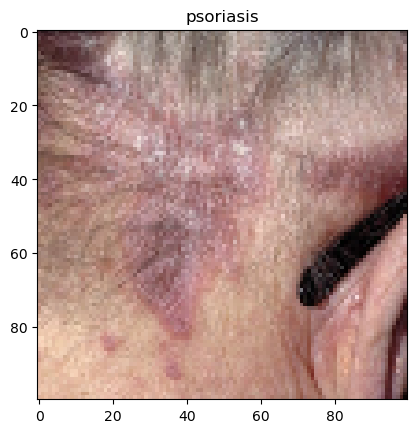

In [167]:
p=list((result*100).astype('int'))
pp=list(p[0])	
print(pp)
print("Largest element is:",max(pp))
index=pp.index(max(pp))
name_class=['psoriasis','guttate psoriasis']
name_class[index]
plt.title(name_class[index])
plt.imshow(img)
